# CINE EN 2018
1884093 García Rosas Tania Dessiré


&nbsp;
1724741 Valero Fuentes Alejandra Maricela

### PREGUNTAS DE INTERÉS
* ¿Cuál será la cantidad de películas que se estrenarán en el 2018?
* ¿De qué género son las películas que tienen las películas con mayor rating?    

### Justificación del uso de datos.
* ¿Cuáles fueron las características que les llamó la atención de los datos. Qué les hizo querer trabajar con ellos? Al buscar la base de datos, queríamos que tuviera información necesaria, variables tanto cualitativas como cuantitativas para hacer las valuaciones pertinentes en cada caso como lo hemos visto en clase, además buscamos un tema de interés y  actualmente a todo mundo le gusta ver películas.
* ¿Qué beneficio encuentran de trabajar con estos datos? Es una información muy detalla y la base de datos es amplia. Gracias a esto nuestras predicciones y resolución de nuestras preguntas de interés pueden ser más acertadas.

In [26]:
import pandas as pd
import numpy as np
import json
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
%matplotlib inline
database = pd.read_csv("C:/Users/USUARIO/Documents/GitHub/MINERIA_DE_DATOS/filmsdatabase.csv")
database.head(5)

,filmtv_id,title,year,genre,duration,country,director,actors,avg_vote,votes,description,notes
0,46666,Hot Water,1924.0,Comedy,59,United States,"Fred C. Newmeyer, Sam Taylor","Harold Lloyd, Jobyna Ralston, Josephine Crowel...",10.0,1,NaN,NaN
1,13569,Gabriel Over the White House,1933.0,Drama,87,United States,Gregory La Cava,"Walter Huston, Karen Morley, Franchot Tone, Ar...",10.0,1,NaN,NaN
2,31476,Zuiderzee,1934.0,Documentary,54,Holland,Joris Ivens,NaN,10.0,1,NaN,NaN
3,31243,Intermezzo,1936.0,Drama,93,Sweden,Gustaf Molander,"Gösta Ekman, Inga Tidblad, Ingrid Bergman, Bul...",10.0,1,NaN,NaN
4,76646,Fire Over England,1937.0,Adventure,92,Great Britain,William K. Howard,"Flora Robson, Raymond Massey, Leslie Banks, La...",10.0,1,Queen Elizabeth I is on the throne of England....,NaN


In [2]:
database.shape

(52845, 12)

In [3]:
database.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'director', 'actors', 'avg_vote', 'votes', 'description', 'notes'],
      dtype='object')

In [4]:
database.dtypes

filmtv_id        int64
title           object
year           float64
genre           object
duration         int64
country         object
director        object
actors          object
avg_vote       float64
votes            int64
description     object
notes           object
dtype: object

### DESCRIPCION DE LA BASE DE DATOS
Se tiene una base de datos en la que son clasificadas 52845 películas.


&nbsp;
Se clasifican de manera cualitativa por género, país, descripción, notas, quien la dirigió, los protagonistas.
Por otra parte, de manera cuantitativa se comtempla la duración, el año, los votos y el promedio de evaluación.
Estamos evaluando 10 variables para cada pelicula.


&nbsp;
Entonces, tenemos que nuestra matriz de datos es de 52845x12.


In [27]:
data=database.drop(['filmtv_id','votes','notes','description','director','actors'],axis=1)
data.head(5)

,title,year,genre,duration,country,avg_vote
0,Hot Water,1924.0,Comedy,59,United States,10.0
1,Gabriel Over the White House,1933.0,Drama,87,United States,10.0
2,Zuiderzee,1934.0,Documentary,54,Holland,10.0
3,Intermezzo,1936.0,Drama,93,Sweden,10.0
4,Fire Over England,1937.0,Adventure,92,Great Britain,10.0


In [6]:
data.isnull().sum()

title         0
year         12
genre       202
duration      0
country      49
avg_vote      0
dtype: int64

In [28]:
films=data.dropna()
films.head(5)

,title,year,genre,duration,country,avg_vote
0,Hot Water,1924.0,Comedy,59,United States,10.0
1,Gabriel Over the White House,1933.0,Drama,87,United States,10.0
2,Zuiderzee,1934.0,Documentary,54,Holland,10.0
3,Intermezzo,1936.0,Drama,93,Sweden,10.0
4,Fire Over England,1937.0,Adventure,92,Great Britain,10.0


### MANIPULACIÓN DE LA BASE DE DATOS
Lo primero que realizamos es la eliminación de las columnas que no vamos a ocupar.

&nbsp;
Para esta base de datos eliminamos seis columnas. Empezamos con la columna del id, se elimina ya que esta no tiene importacia al igual que la columna de notas. La columna de votos es innecesaria pues solo cuenta cuantas personas votaron y lo que realmente nos interesa es el promedio de dicha votación y también eliminamos la columna de descripción ya que cuenta con muchos valores nulos y si la tomamos en cuenta nuestra base de datos quedaría reducida a más del 50%. Por último se considera eliminar las columnas de actores y director debido a que no tienen mucha influencia esas variables, realmente siempre dejará de haber unos y llegarán otros, pues cada uno tuvo su momento.

&nbsp;
Luego eliminamos los datos nulos restantes. Al final quedan 52832 datos con los cuales trabajaremos.
    

In [8]:
films['year'].min()

1909.0

In [9]:
films['year'].max()

2018.0

In [10]:
films['duration'].describe()

count    52585.000000
mean        98.230902
std         24.991813
min         40.000000
25%         89.000000
50%         95.000000
75%        105.000000
max        924.000000
Name: duration, dtype: float64

En esta descripción de valores cuantitativos podemos notar que de 49607 películas evaluadas, tenemos un rango que va de 40 minutos a 924 minutos, con un promedio de 95 minutos. Con esto concluimos que en promedio las películas duran hora y media.

In [11]:
films['avg_vote'].describe()

count    52585.000000
mean         5.845389
std          1.522194
min          0.500000
25%          5.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: avg_vote, dtype: float64

El promedio de votos obtenidos es de 6 sobre 10. Las votaciones cuentan con un máximo de 10 puntos, lo cual es bueno, ya que no llegamos a tocar el 0 en una calificación mínima.

In [12]:
films.corr()

,year,duration,avg_vote
year,1.000000,0.054344,-0.158888
duration,0.054344,1.000000,0.108425
avg_vote,-0.158888,0.108425,1.000000


In [13]:
films.cov()

,year,duration,avg_vote
year,521.902883,31.027490,-5.525299
duration,31.027490,624.590719,4.124732
avg_vote,-5.525299,4.124732,2.317074


### ESTADISTICAS
A decir verdad no existe una relación entre el puntaje y la duración. De manera que si la película llegará a durr minutos más o menos no afectaría de manera significativa su valoración. 

# Gráficos

In [15]:
from matplotlib import pylab, mlab, pyplot
from numpy import *
from pylab import *
from IPython.display import display
from IPython.core.pylabtools import figsize

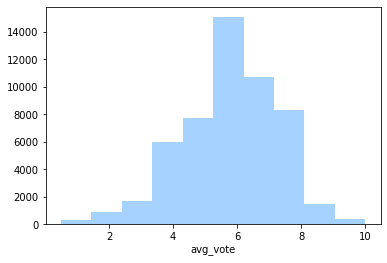

In [16]:
sns.distplot(films['avg_vote'],bins=10,kde=False,color='DodgerBlue')

Aquí se presenta una descripción gráfica de el promedio de votos. La mayoría de las películas tienen un promedio de votos entre 5 y 6, con lo que confirmamos lo que se arrojo en la descripción analítica.

#### Gráficos por género

In [17]:
films['genre'].value_counts().head()

Drama          15861
Comedy         11600
Thriller        4868
Documentary     3153
Action          2868
Name: genre, dtype: int64

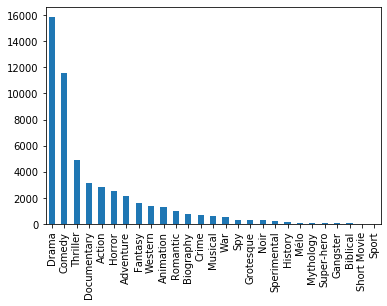

In [18]:
films['genre'].value_counts().plot.bar()

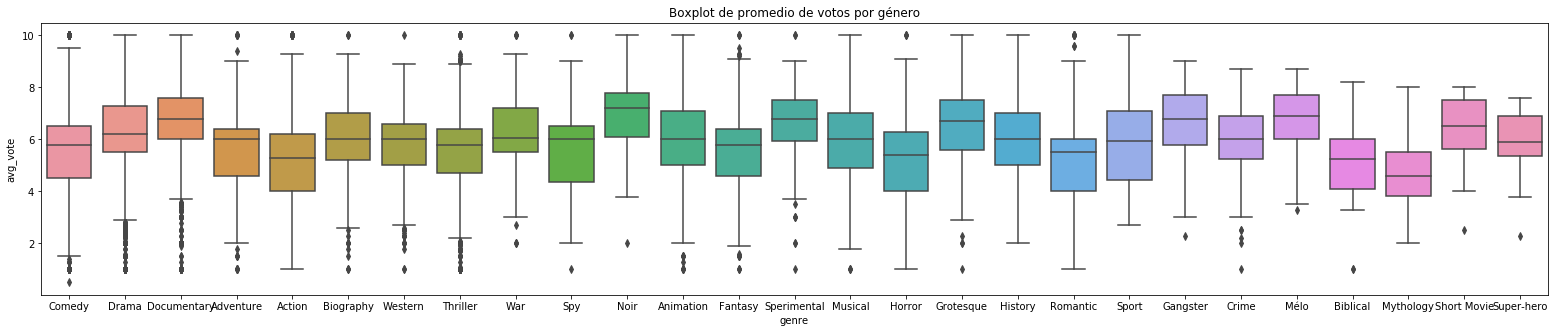

In [19]:
plt.figure(figsize(27,5))
fdb= films[films.genre.isin(films.genre.value_counts().index)]
sns.boxplot(x='genre', y='avg_vote', data=fdb)
plt.title('Boxplot de promedio de votos por género')
plt.show()

In [20]:
gv=films.groupby('genre').mean().avg_vote.sort_values(ascending=False)
gv.head()

genre
Noir           6.979927
Mélo           6.658772
Sperimental    6.582243
Gangster       6.557377
Documentary    6.554139
Name: avg_vote, dtype: float64

Podemos ver en la proyección del gráfico de barras (gráfico 1) la cantidad de películas que se han realizado por género. Nuestro top diez de producciones por género son de Drama (15861), Comedia(11600), Suspenso(4868), Documentales(3153), Acción(2868), Horror(2522), Aventura(2178), Fantasía(1597), Vaqueros(1351) y Animación(1300). Apreciamos que los primeros géneros con mayor producción difieren mucho entre sí. Debajo de este top diez vemos que la producción se distribuye más uniformamente con los demás géneros.

&nbsp;
En base al BoxPlot (gráfico 2) nos damos cuenta de la relación del promedio de votos por género. Vemos que son pocos los géneros en donde los valores no estan sesgados, es decir, donde nuestra mediana, media y moda coinciden. También en casi todos presentan valores atipicos. Los géneros que se notan más estabilizados son Historia, Deportes y Mitología.


A simple vista, se aprecia que los géneros mejor evaluados son Noir, Mélo, Experimental, Gangster, Documentales, Grotesco, Películas cortas, Drama, Guerra y Biográficas. 

&nbsp;
En base a lo anterior, llegamos a la conclusión de que no por producirse más un género se va a tener mejor puntaje. Se producen más debido a la demanda que tiene el género, sin embargo, eso no nos asegura que sean buenas o que gusten. Los géneres que tienen mayor relación entre promedio de votos y cantidad de películas son los Documentales, las películas de Drama, de Animación, Biográficas y de Crimen.

## Predicción

Creamos una tabla con los años y con la cantidad de películas para hacer nuestra estimación 

In [33]:
films.year.astype("int")

cant=films.groupby(['year']).count()

films= films.drop(films[films['year']==2018].index)

predict=films.groupby(['year']).count()
predict=predict.drop(['genre','duration','country','avg_vote'],axis=1)

predict['year']=range(1909,2018,1)
predict=predict.rename(columns={'title':'total'})
predict.tail()

,total,year
year,,
2013.0,1611,2013
2014.0,1596,2014
2015.0,1617,2015
2016.0,1645,2016
2017.0,1564,2017


In [22]:
predict.corr()

,total,year
total,1.000000,0.924803
year,0.924803,1.000000


#### Gráficos de predicción

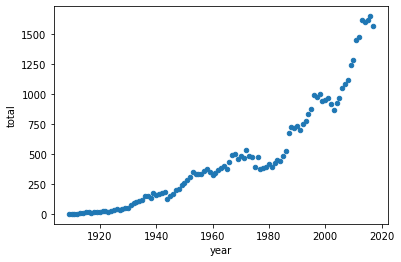

In [29]:
predict.sample(109).plot.scatter(x='year', y='total')

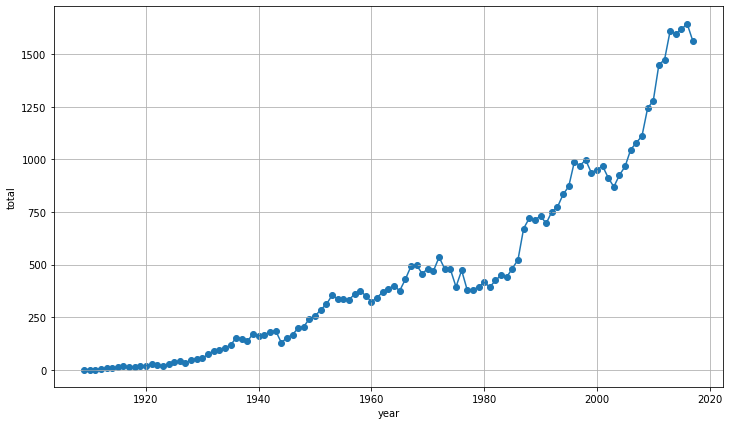

In [30]:
fig = plt.figure(figsize=(12,7))
plt.scatter(predict['year'],predict['total'])
plt.plot(predict['year'],predict['total'])
plt.xlabel('year')
plt.ylabel('total')
plt.grid()

In [35]:
total = predict['total'].values.reshape(-1,1)
anio = predict['year'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(anio, total)
nImages_pred = linear_regressor.predict(anio)

In [36]:
#y=mx+c
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
label = r'$cantidad = %0.4f*anio %+0.4f$'%(m,c)
print(label)

$cantidad = 12.7674*anio -24592.3663$


In [37]:
an = 12.7674*2018 -24592.3663
print(an)

1172.2468999999983


In [38]:
error=((1341-1172.2469)/1341)*100
error

12.584123788217742

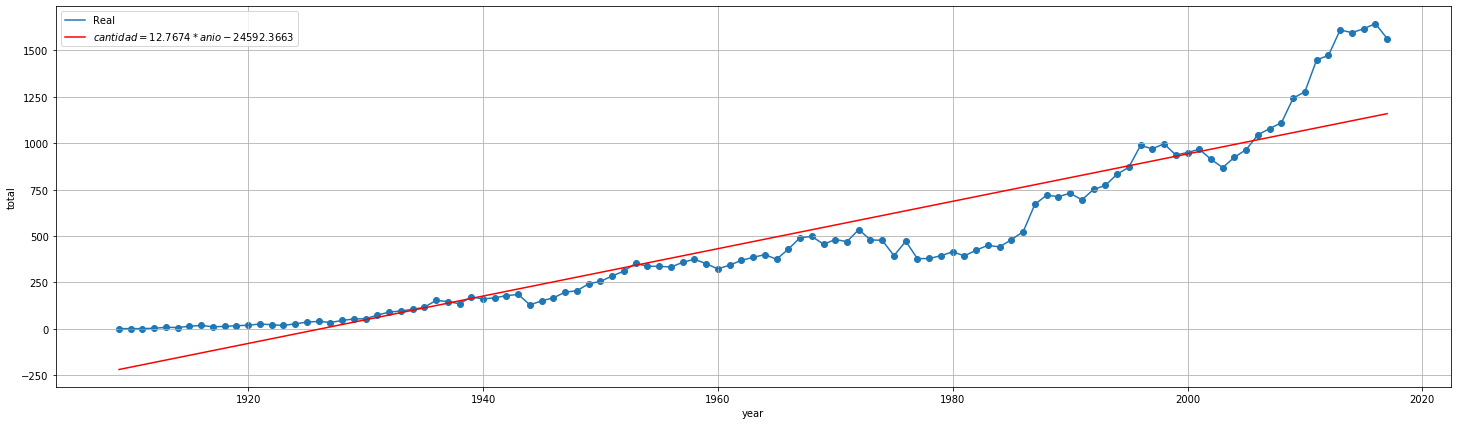

In [45]:
fig = plt.figure(figsize=(25,7))
plt.scatter(predict['year'],predict['total'])
plt.plot(predict['year'],predict['total'],label='Real')
plt.plot(anio,nImages_pred, color='red', label=label)
plt.xlabel('year')
plt.ylabel('total')
plt.legend()
plt.grid()

### PREGUNTAS DE INTERÉS
* ¿Cuál será la cantidad de películas que se estrenarán en el 2018?

Con un error del 12.58% tenemos estimado que se produjeron 1172 películas en el año 2018. 


* ¿De qué género son las películas que tienen las películas con mayor rating?

De acuerdo a los gráficos de BoxPlot podemos determinar que las peliculas con mejor rating son las del género Noir con votos promedio de 6.9799. Pero al momento de considerar también la cantidad de películas realizadas tenemos que el género que tiene mejor rating es el de los Documentales con un promedio de votos de 6.5541. Nuestra respuesta a esta pregunta será la de Documentales debido a la proporción que se maneja con la cantidad de películas, es decir, tenemos una producción de 274 películas del género Noir y 3153 Documentales. Tomando en cuenta lo anterior, vale la pena arriesgar menos del 0.43 puntos de 10 posibles cuando tu producción que es más de 10 veces mayor y aun así maneja uno de los promedios de votos más altos.
